In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lstm import LSTM

In [2]:
weather_train = pd.read_csv('./data/DailyDelhiClimateTrain.csv')
weather_test = pd.read_csv('./data/DailyDelhiClimateTest.csv')
print(weather_train.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


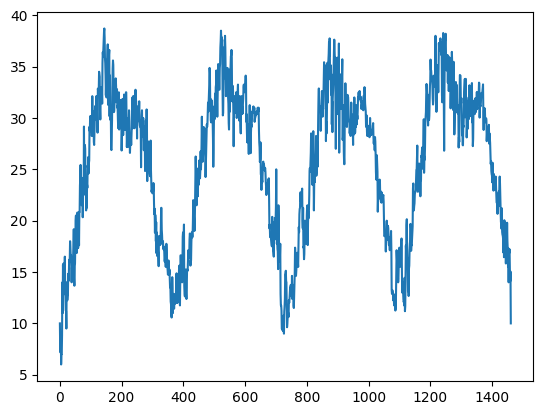

In [3]:
#quick look at mean temperature ovee time
m_temp = weather_train['meantemp'].values
plt.plot(m_temp)

In [4]:
print(m_temp.shape)

(1462,)


In [5]:
def mse_loss(predictions, targets):
    return np.mean((predictions - targets) ** 2)

In [21]:
input_size = 1
hidden_size = 128
output_size = 1
learning_rate = 0.001
num_epochs = 100

In [14]:
lstm_model = LSTM(input_size, hidden_size, output_size)

In [22]:
for epoch in range(num_epochs):
    for i in range(len(m_temp) - 1):
        x = np.array([[m_temp[i]]])
        y_true = np.array([[m_temp[i + 1]]])

        # Forward pass
        output, hidden_state, cell_state = lstm_model.forward(x)

        # Calculate loss
        loss = np.mean(np.square(output - y_true))

        # Backward pass
        d_output = 2 * (output - y_true) / output.size
        d_hidden_state = np.zeros_like(hidden_state)
        d_cell_state = np.zeros_like(cell_state)
        _, _ = lstm_model.backward(d_output, d_hidden_state, d_cell_state, learning_rate)

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

Epoch 0, Loss: 33.28661692100045
Epoch 10, Loss: 36.03703188793072
Epoch 20, Loss: 33.16159062980814
Epoch 30, Loss: 30.495411314392786
Epoch 40, Loss: 28.999818502903576
Epoch 50, Loss: 34.151763238431
Epoch 60, Loss: 33.337649909388475
Epoch 70, Loss: 39.11937924126954
Epoch 80, Loss: 29.73634070029042
Epoch 90, Loss: 28.966579650558796


In [24]:
predicted_temperatures = []
for i in range(len(weather_test) - 1):
    x = np.array([[weather_test['meantemp'].iloc[i]]])
    output, _, _ = lstm_model.forward(x)
    predicted_temperatures.append(output[0, 0])

In [26]:
# Calculate Mean Squared Error (MSE)
mse = np.mean((np.array(weather_test['meantemp'][1:]) - np.array(predicted_temperatures))**2)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 32.785609767872195


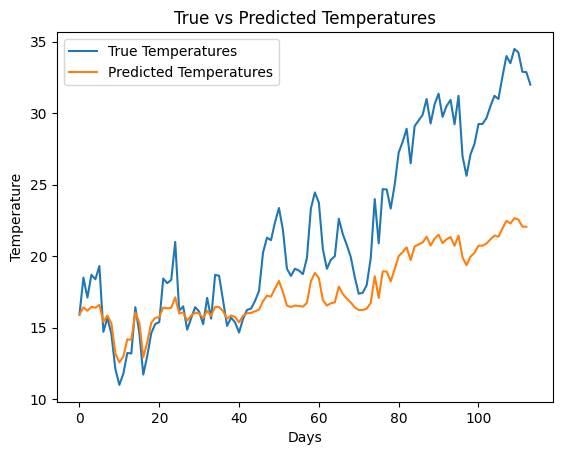

In [25]:
plt.plot(weather_test['meantemp'], label='True Temperatures')
plt.plot(predicted_temperatures, label='Predicted Temperatures')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.title('True vs Predicted Temperatures')
plt.legend()
plt.show()